In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_train_activity = pd.read_csv('/content/drive/MyDrive/데분프/프로젝트/128.치매 고위험군 라이프로그/01.데이터/1.Training/원천데이터/1.걸음걸이/train_activity.csv')
raw_train_sleep = pd.read_csv('/content/drive/MyDrive/데분프/프로젝트/128.치매 고위험군 라이프로그/01.데이터/1.Training/원천데이터/2.수면/train_sleep.csv')
raw_train_mmse = pd.read_csv('/content/drive/MyDrive/데분프/프로젝트/128.치매 고위험군 라이프로그/01.데이터/1.Training/원천데이터/3.인지기능/train_mmse.csv')

train_label = pd.read_csv('/content/drive/MyDrive/데분프/프로젝트/128.치매 고위험군 라이프로그/01.데이터/1.Training/라벨링데이터/1.걸음걸이/training_label.csv')

# **3개의 데이터셋은 치매 고위험군 라이프로그 데이터로서, 인지 정상(CN), 경도 인지 장애(MCI), 치매(DEM) 총 3가지의 클래스로 구분되는 참가자들의 하루 활동 결과, 수면 결과, 인지기능 테스트 결과를 나타낸다.**

#**라벨데이터는 EMAIL로 구분되는 참가자들의 인지 수준을 나타낸다.**

##**이번 데이터 분석 프로젝트에서는 인지 정상, 경도 인지 장애, 치매를 갖는 참가자들의 차이점이 어떠한지를 분석해보고자 한다.**


**CN: 인지 정상  
MCI: 경도 인지 장애  
DEM: 치매  
MET: 1분간 소비되는 단위 체중당 에너지 소비량**



In [2]:
#하루 활동 결과 데이터셋은 총 9705행, 31열로 이루어져 있다. object, int, float 타입으로 구성되어 있다.
raw_train_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EMAIL                                    9705 non-null   object 
 1   activity_average_met                     9705 non-null   float64
 2   activity_cal_active                      9705 non-null   int64  
 3   activity_cal_total                       9705 non-null   int64  
 4   activity_class_5min                      9705 non-null   object 
 5   activity_daily_movement                  9705 non-null   int64  
 6   activity_day_end                         9705 non-null   object 
 7   activity_day_start                       9705 non-null   object 
 8   activity_high                            9705 non-null   int64  
 9   activity_inactive                        9705 non-null   int64  
 10  activity_inactivity_alerts               9705 no

In [3]:
raw_train_activity

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,...,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8)
0,nia+279@rowan.kr,1.28125,196,2251,...,3353,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00,0,714,...,78,100,100,54,100,97,4212,207,1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/...,1.2/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...
1,nia+279@rowan.kr,1.25000,145,2159,...,2516,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00,0,719,...,60,100,100,58,96,96,3306,140,1/1/1/2/2/2/2/2/2/2/2/2/1/1/1/1/1/2/3/3/3/3/2/...,0.9/0.9/1.3/1/0.9/0.9/1.1/0.9/1/0.9/1/0.9/1/0....
2,nia+279@rowan.kr,1.21875,118,2140,...,1716,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00,0,708,...,43,95,100,55,71,83,2550,131,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
3,nia+279@rowan.kr,1.28125,180,2240,...,2791,2020-10-23T03:59:59+09:00,2020-10-22T04:00:00+09:00,0,705,...,43,100,100,58,71,59,4009,208,1/1/1/1/1/1/1/1/1/1/2/2/2/2/3/3/3/2/3/3/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
4,nia+279@rowan.kr,1.46875,374,2559,...,5393,2020-10-24T03:59:59+09:00,2020-10-23T04:00:00+09:00,0,437,...,43,100,100,89,40,46,8081,517,1/1/1/2/2/2/2/2/2/1/1/1/3/2/2/1/2/2/2/3/3/2/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,1.34375,249,2351,...,4411,2020-12-25T03:59:59+09:00,2020-12-24T04:00:00+09:00,1,780,...,25,43,100,45,40,95,4972,190,1/1/1/1/1/1/1/1/1/1/2/3/2/2/2/1/1/1/1/1/1/1/1/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
9701,nia+206@rowan.kr,1.53125,570,2682,...,11057,2020-12-27T03:59:59+09:00,2020-12-26T04:00:00+09:00,1,518,...,43,95,100,76,71,93,11878,394,1/1/1/1/1/1/2/2/2/2/2/2/1/1/1/1/1/1/1/1/1/1/1/...,0.9/0.9/0.9/0.9/1.1/0.9/0.9/1.1/0.9/0.9/0.9/0....
9702,nia+206@rowan.kr,1.34375,295,2331,...,5135,2020-12-28T03:59:59+09:00,2020-12-27T04:00:00+09:00,4,578,...,25,100,100,70,40,95,5752,207,1/1/1/2/3/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...,1.1/0.9/0.9/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...
9703,nia+206@rowan.kr,1.31250,186,2280,...,3178,2020-12-29T03:59:59+09:00,2020-12-28T04:00:00+09:00,0,778,...,25,95,100,47,40,93,3852,156,1/1/1/1/1/1/1/1/1/1/1/1/2/2/0/0/0/0/0/0/0/0/0/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....


In [4]:
#인지기능 테스트 결과는 총 141행, 38열로 이루어져 있다. 열에 라벨 값이 포함되어 있음.
raw_train_mmse

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,nia+181@rowan.kr,1,CN,-,1,2,2,2,2,1,...,2,2,2,2,2,1,2,2,2,26
137,nia+354@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,26
138,nia+448@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28
139,nia+394@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28


In [5]:
#수면 활동 결과는 9705행과 36열로 이루어져 있다
raw_train_sleep

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,nia+279@rowan.kr,8700,2020-10-19T05:10:28+09:00,2020-10-18T18:38:28+09:00,17.875,10110,37920,77,...,53.04,...,65,89,56,94,0.00,0.00,29220,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/...,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/...,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/...
1,nia+279@rowan.kr,6570,2020-10-20T05:37:52+09:00,2020-10-19T21:39:52+09:00,18.000,7440,28680,77,...,52.82,...,65,97,43,65,0.34,0.34,22110,0/51/0/51/52/52/52/52/53/53/53/52/52/53/53/53/...,4/2/4/2/2/2/1/1/1/2/2/3/3/3/3/3/3/3/1/1/1/4/4/...,0/49/0/38/51/17/18/18/26/27/24/29/36/31/32/34/...
2,nia+279@rowan.kr,10530,2020-10-21T05:45:28+09:00,2020-10-20T20:51:28+09:00,18.000,4620,32040,67,...,52.01,...,41,75,68,62,-0.07,-0.07,21510,54/56/0/55/53/55/56/55/0/55/54/54/54/0/0/55/55...,4/2/1/1/2/2/4/4/4/4/2/2/2/4/4/4/2/4/4/4/4/4/4/...,56/47/0/49/42/57/44/49/0/46/54/47/55/0/0/55/53...
3,nia+279@rowan.kr,4080,2020-10-22T05:12:16+09:00,2020-10-21T22:08:16+09:00,17.500,7440,25440,84,...,51.07,...,81,83,73,62,-0.14,-0.14,21360,0/54/53/53/54/54/54/53/53/53/53/54/51/50/51/51...,4/4/1/1/1/1/1/1/1/1/1/4/2/2/2/2/1/1/1/1/1/4/2/...,0/40/40/40/37/46/35/46/44/56/50/48/41/55/55/50...
4,nia+279@rowan.kr,7170,2020-10-23T02:23:30+09:00,2020-10-22T20:38:30+09:00,17.875,4320,20700,65,...,50.80,...,39,78,25,29,-0.50,-0.50,13530,0/49/50/50/50/50/50/50/51/0/0/0/0/0/0/0/0/50/5...,4/2/2/2/2/1/1/1/2/4/4/4/4/4/4/4/4/4/2/1/1/1/1/...,0/81/60/74/62/63/56/78/81/0/0/0/0/0/0/0/0/60/4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,6000,2020-12-24T06:51:37+09:00,2020-12-23T21:35:37+09:00,15.875,1710,33360,82,...,63.75,...,76,81,95,86,-0.09,-0.09,27360,68/66/67/67/68/69/69/70/71/71/71/69/72/70/70/7...,4/4/2/2/2/1/1/1/1/1/1/2/2/3/3/2/2/2/2/2/3/4/2/...,26/16/19/18/16/18/19/17/15/16/15/13/11/13/13/1...
9701,nia+206@rowan.kr,5700,2020-12-26T06:36:19+09:00,2020-12-25T22:54:19+09:00,16.125,0,27720,79,...,67.40,...,69,86,89,64,0.41,0.41,22020,0/0/65/65/66/67/69/72/73/72/73/74/73/74/75/75/...,4/4/2/2/2/2/2/2/2/2/2/2/4/4/4/4/2/3/3/3/2/2/4/...,0/0/13/12/12/13/12/12/12/16/13/12/13/17/13/18/...
9702,nia+206@rowan.kr,5070,2020-12-27T07:56:40+09:00,2020-12-26T22:05:40+09:00,15.625,480,35460,86,...,64.84,...,86,89,98,97,0.27,0.27,30390,0/0/0/64/64/64/64/65/65/66/66/66/66/68/68/68/6...,4/4/4/4/2/2/2/2/2/2/2/2/2/3/3/3/3/2/4/4/2/2/2/...,0/0/0/14/17/18/14/14/17/15/17/12/17/12/13/12/1...
9703,nia+206@rowan.kr,2040,2020-12-28T05:05:45+09:00,2020-12-27T21:21:45+09:00,15.875,2220,27840,93,...,67.05,...,98,89,86,80,-0.05,-0.05,25800,0/60/60/61/60/60/60/62/64/64/64/64/65/68/70/70...,4/4/1/2/2/2/2/1/2/2/2/1/1/1/3/3/1/1/2/2/3/3/3/...,0/14/15/14/15/16/17/16/16/18/18/20/23/15/21/20...


In [6]:
train_label

,SAMPLE_EMAIL,DIAG_NM
0,nia+315@rowan.kr,CN
1,nia+014@rowan.kr,MCI
2,nia+220@rowan.kr,CN
3,nia+096@rowan.kr,MCI
4,nia+396@rowan.kr,CN
...,...,...
136,nia+181@rowan.kr,CN
137,nia+354@rowan.kr,CN
138,nia+448@rowan.kr,MCI
139,nia+394@rowan.kr,CN


In [7]:
#라벨링된 결과를 살펴보면 인지정상은 85, 경도 인지 장애는 47, 치매는 9명의 참가자가 속해있음을 확인할 수 있다.
train_label['DIAG_NM'].value_counts()

CN     85
MCI    47
Dem     9
Name: DIAG_NM, dtype: int64

#데이터 분석을 하기 위해 object 타입을 가지는 열을 삭제해주는 전처리를 수행해준다.  
#activity 데이터셋에서는 참가자를 구분하기 위한 'EMAIL'열을 제외한 ['activity_class_5min', 'activity_met_1min','activity_day_end', 'activity_day_start', 'CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)'] 을 제거해준다.  

#sleep 데이터셋에서도 동일하게 'EMAIL'열을 제외한 ['sleep_hr_5min', 'sleep_hypnogram_5min', 'sleep_rmssd_5min', 'CONVERT(sleep_hr_5min USING utf8)', 'CONVERT(sleep_hypnogram_5min USING utf8)', 'CONVERT(sleep_rmssd_5min USING utf8)'] 을 제거해준다.  
#이때 sleep 데이터셋에서 잠이 든 시간과 일어난 시간이 중요하다고 판단하여, 이 부분은 제외하고 제거해주었다.

In [8]:
#acticity, sleep 데이터셋에서 object 타입 열을 삭제해준다.
train_activity_drop = raw_train_activity.drop(['activity_class_5min', 'activity_met_1min','activity_day_end', 'activity_day_start', 'CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)'], axis=1)
train_sleep_drop = raw_train_sleep.drop(['sleep_hr_5min', 'sleep_hypnogram_5min', 'sleep_rmssd_5min', 'CONVERT(sleep_hr_5min USING utf8)', 'CONVERT(sleep_hypnogram_5min USING utf8)', 'CONVERT(sleep_rmssd_5min USING utf8)'], axis = 1)

In [9]:
#drop 결과 확인
train_activity_drop

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,...,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total
0,nia+279@rowan.kr,1.28125,196,2251,3353,0,714,0,201,6,...,519,87,78,100,100,54,100,97,4212,207
1,nia+279@rowan.kr,1.25000,145,2159,2516,0,719,0,131,9,...,464,83,60,100,100,58,96,96,3306,140
2,nia+279@rowan.kr,1.21875,118,2140,1716,0,708,1,125,6,...,601,73,43,95,100,55,71,83,2550,131
3,nia+279@rowan.kr,1.28125,180,2240,2791,0,705,0,203,5,...,442,70,43,100,100,58,71,59,4009,208
4,nia+279@rowan.kr,1.46875,374,2559,5393,0,437,0,511,6,...,453,70,43,100,100,89,40,46,8081,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,1.34375,249,2351,4411,1,780,4,167,22,...,470,61,25,43,100,45,40,95,4972,190
9701,nia+206@rowan.kr,1.53125,570,2682,11057,1,518,1,332,61,...,528,78,43,95,100,76,71,93,11878,394
9702,nia+206@rowan.kr,1.34375,295,2331,5135,4,578,0,173,30,...,655,70,25,100,100,70,40,95,5752,207
9703,nia+206@rowan.kr,1.31250,186,2280,3178,0,778,1,138,18,...,393,66,25,95,100,47,40,93,3852,156


In [10]:
#drop 결과 확인
train_sleep_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EMAIL                        9705 non-null   object 
 1   sleep_awake                  9705 non-null   int64  
 2   sleep_bedtime_end            9705 non-null   object 
 3   sleep_bedtime_start          9705 non-null   object 
 4   sleep_breath_average         9705 non-null   float64
 5   sleep_deep                   9705 non-null   int64  
 6   sleep_duration               9705 non-null   int64  
 7   sleep_efficiency             9705 non-null   int64  
 8   sleep_hr_average             9705 non-null   float64
 9   sleep_hr_lowest              9705 non-null   int64  
 10  sleep_is_longest             9705 non-null   int64  
 11  sleep_light                  9705 non-null   int64  
 12  sleep_midpoint_at_delta      9705 non-null   int64  
 13  sleep_midpoint_tim

In [11]:
#sleep 데이터셋에서 잠이 든 시각과 일어난 시간 열을 살펴보면 날짜 + 시간으로 구성되어 있는데 이 중 시간만 추출하기 위해서
#pandas의 to_datetime() 메서드를 이용하여 시계열 타입으로 전환해주었다.

train_sleep_drop['sleep_bedtime_end']  = pd.to_datetime(train_sleep_drop['sleep_bedtime_end'])
train_sleep_drop['sleep_bedtime_start']  = pd.to_datetime(train_sleep_drop['sleep_bedtime_start'])

In [12]:
#시간 계산을 용이하게 하기 위해서 시간(hour)에 60을 곱해주고 분(minute)을 더한 결과로 바꿔주었다.

train_sleep_drop['sleep_bedtime_end'] = train_sleep_drop['sleep_bedtime_end'].dt.hour * 60 + train_sleep_drop['sleep_bedtime_end'].dt.minute
train_sleep_drop['sleep_bedtime_start'] = train_sleep_drop['sleep_bedtime_start'].dt.hour * 60 + train_sleep_drop['sleep_bedtime_start'].dt.minute
train_sleep_drop

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,...,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total
0,nia+279@rowan.kr,8700,310,1118,17.875,10110,37920,77,53.04,49,...,87,100,78,65,89,56,94,0.00,0.00,29220
1,nia+279@rowan.kr,6570,337,1299,18.000,7440,28680,77,52.82,49,...,100,98,77,65,97,43,65,0.34,0.34,22110
2,nia+279@rowan.kr,10530,345,1251,18.000,4620,32040,67,52.01,47,...,100,94,60,41,75,68,62,-0.07,-0.07,21510
3,nia+279@rowan.kr,4080,312,1328,17.500,7440,25440,84,51.07,46,...,100,98,80,81,83,73,62,-0.14,-0.14,21360
4,nia+279@rowan.kr,7170,143,1238,17.875,4320,20700,65,50.80,47,...,80,88,72,39,78,25,29,-0.50,-0.50,13530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,6000,411,1295,15.875,1710,33360,82,63.75,57,...,100,34,57,76,81,95,86,-0.09,-0.09,27360
9701,nia+206@rowan.kr,5700,396,1374,16.125,0,27720,79,67.40,61,...,100,1,56,69,86,89,64,0.41,0.41,22020
9702,nia+206@rowan.kr,5070,476,1325,15.625,480,35460,86,64.84,60,...,100,9,59,86,89,98,97,0.27,0.27,30390
9703,nia+206@rowan.kr,2040,305,1281,15.875,2220,27840,93,67.05,60,...,100,44,59,98,89,86,80,-0.05,-0.05,25800


In [13]:
#sleep 데이터셋의 마지막 부분 중 'sleep_temperature_delta'과 'sleep_temperature_deviation'이 비슷한 것 같아
#만약 두 열이 같이 값을 가진다면 삭제해주기 위하여 unique 값을 확인해주었다.

compare_tem = pd.DataFrame()
compare_tem['result'] = train_sleep_drop['sleep_temperature_delta'] == train_sleep_drop['sleep_temperature_deviation']
compare_tem['result'].unique()

array([ True])

In [14]:
#sleep_temperature_delta와 sleep_temperature_deviation 열이 동일하다는 것을 확인하였기 때문에 sleep_temperature_deviation 열을 삭제해주었다.

train_sleep_drop.drop(['sleep_temperature_deviation'], axis=1, inplace = True)

In [15]:
train_sleep_drop.info() #sleep_temperature_deviation열이 삭제되었음을 확인하였다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EMAIL                     9705 non-null   object 
 1   sleep_awake               9705 non-null   int64  
 2   sleep_bedtime_end         9705 non-null   int64  
 3   sleep_bedtime_start       9705 non-null   int64  
 4   sleep_breath_average      9705 non-null   float64
 5   sleep_deep                9705 non-null   int64  
 6   sleep_duration            9705 non-null   int64  
 7   sleep_efficiency          9705 non-null   int64  
 8   sleep_hr_average          9705 non-null   float64
 9   sleep_hr_lowest           9705 non-null   int64  
 10  sleep_is_longest          9705 non-null   int64  
 11  sleep_light               9705 non-null   int64  
 12  sleep_midpoint_at_delta   9705 non-null   int64  
 13  sleep_midpoint_time       9705 non-null   int64  
 14  sleep_on

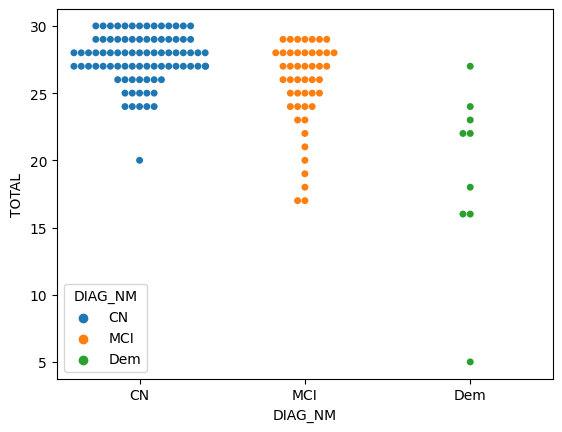

In [16]:
#인지능력 테스트 결과를 타겟 변수로 구분하여 테스트 결과 총점을 시각화한 자료이다.
#세 개의 클래스 CN(인지 정상), MCI(경도 인지 장애), DEM(치매)의 개수가 동일하지 않고, 치매인 경우에 낮은 점수를 띄고 있는 것을 확인할 수 있지만,
#인지 정상과 경도 인지 장애는 큰 차이점을 나타내지 않기 때문에 이 데이터셋은 이번 분석에서 사용하지 않도록 결정하였다.
sns.swarmplot(x = 'DIAG_NM', y = 'TOTAL', hue = 'DIAG_NM', data = raw_train_mmse)
plt.show()

# 지금까지 object 타입 데이터를 삭제하고, 중복 값을 가지는 데이터 열을 삭제, 시계열 데이터를 계산하기 편한 수치로 변경해보았다.

In [17]:
#전처리가 된 activity 데이터의 한 행은 참가자의 하루 활동 로그를 나타낸다. 한 참가자가 여러 날을 활동한 경우 여러 행에 걸쳐 활동 결과들이 나타난다.
#EMAIL열이 참가자를 구분하는 열이기 때문에, EMAIL열로 그룹화를 진행하고 각 값은 평균으로 계산하여 주었다.

#그 결과 141행(참가자 총 141명)으로 데이터셋이 줄어들었음을 확인할 수 있다.
grouping_activity = train_activity_drop.groupby('EMAIL').mean()
grouping_activity

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total
EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.262897,202.571429,2208.333333,3659.730159,0.793651,615.142857,0.809524,146.428571,18.333333,5.984127,...,618.063492,58.682540,18.793651,92.492063,99.698413,66.269841,21.682540,53.031746,4518.460317,165.555556
nia+005@rowan.kr,1.370299,217.477876,1773.504425,5084.876106,0.256637,574.619469,0.539823,281.300885,15.398230,1.778761,...,521.247788,54.522124,11.601770,95.566372,96.203540,72.088496,6.371681,46.530973,6431.831858,296.955752
nia+010@rowan.kr,1.390625,259.672414,2365.137931,3877.741379,0.637931,632.482759,0.362069,328.827586,9.068966,4.379310,...,434.086207,65.758621,54.068966,97.155172,99.862069,64.965517,16.982759,41.637931,5868.758621,338.534483
nia+014@rowan.kr,1.442555,401.382353,2503.882353,7250.514706,0.382353,534.470588,0.176471,343.852941,30.970588,3.382353,...,492.205882,91.264706,92.147059,99.117647,98.235294,76.750000,83.750000,93.058824,9444.338235,375.205882
nia+015@rowan.kr,1.388393,271.685714,2114.342857,5053.200000,2.057143,484.085714,0.285714,326.485714,28.285714,8.971429,...,493.057143,79.000000,72.542857,98.571429,99.885714,83.142857,43.628571,62.342857,7211.600000,356.828571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,1.625822,660.394737,2761.947368,12410.868421,8.710526,499.973684,0.447368,302.868421,78.710526,70.026316,...,477.500000,90.552632,98.315789,96.184211,78.921053,79.526316,100.000000,99.868421,14147.421053,390.289474
nia+456@rowan.kr,1.542480,573.781250,2676.125000,10846.750000,5.421875,610.515625,0.609375,283.140625,64.000000,40.562500,...,433.781250,87.359375,96.984375,95.437500,76.703125,67.078125,100.000000,99.453125,11940.390625,352.562500
nia+458@rowan.kr,1.257353,200.549020,2206.941176,3377.098039,0.588235,507.117647,0.392157,206.823529,9.176471,4.333333,...,667.764706,61.686275,23.215686,97.568627,99.019608,77.529412,18.705882,53.647059,4347.235294,216.588235


In [18]:
#activity 데이터셋과 마찬가지로 sleep 데이터셋도 EMAIL열로 그룹화를 진행해준다.

grouping_sleep = train_sleep_drop.groupby('EMAIL').mean()
grouping_sleep

,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,...,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_total
EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,7162.857143,482.714286,862.365079,16.454365,4302.857143,30706.666667,77.126984,57.957937,52.158730,1.0,...,67.936508,74.809524,75.492063,57.634921,65.253968,78.650794,54.904762,69.730159,0.022222,23543.809524
nia+005@rowan.kr,2055.663717,437.575221,1248.212389,16.307522,6152.123894,30115.752212,93.070796,65.231947,57.831858,1.0,...,84.168142,86.849558,89.345133,83.601770,97.663717,83.973451,74.433628,81.097345,0.057434,28060.088496
nia+010@rowan.kr,7252.241379,326.000000,1183.534483,16.892241,3081.724138,27499.655172,74.068966,53.175345,46.982759,1.0,...,65.913793,97.931034,61.517241,63.758621,58.034483,76.965517,64.672414,58.344828,-0.045862,20247.413793
nia+014@rowan.kr,6641.911765,377.558824,1151.617647,14.869485,4346.911765,28521.176471,77.764706,63.373676,56.720588,1.0,...,66.617647,94.764706,76.867647,55.500000,66.970588,82.500000,38.779412,63.573529,-0.129706,21879.264706
nia+015@rowan.kr,5147.142857,370.171429,1048.457143,15.725000,8046.857143,28422.857143,81.628571,53.854000,47.885714,1.0,...,72.971429,89.028571,96.542857,66.942857,76.457143,74.800000,20.628571,77.600000,0.237714,23275.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,4365.789474,242.289474,1228.131579,15.414474,3495.000000,27249.473684,84.368421,47.096579,42.763158,1.0,...,72.026316,99.078947,68.236842,61.578947,81.684211,75.684211,64.578947,67.973684,-0.050000,22883.684211
nia+456@rowan.kr,9675.937500,413.546875,1151.250000,17.121094,5021.718750,28637.812500,66.828125,66.115469,60.468750,1.0,...,59.890625,88.718750,85.031250,57.468750,42.156250,83.828125,31.234375,51.750000,-0.125469,18961.875000
nia+458@rowan.kr,8269.411765,438.862745,1160.117647,16.306373,6042.352941,36348.235294,78.156863,67.042157,60.705882,1.0,...,81.313725,90.686275,88.882353,72.745098,67.705882,75.529412,82.607843,85.274510,-0.040000,28078.823529


In [19]:
#라벨 데이터를 sample_email열로 정렬한 후 참가자들의 인지 수준을 확인해본다.
train_label.sort_values('SAMPLE_EMAIL', ascending = True)

,SAMPLE_EMAIL,DIAG_NM
21,nia+003@rowan.kr,MCI
93,nia+005@rowan.kr,CN
97,nia+010@rowan.kr,MCI
1,nia+014@rowan.kr,MCI
5,nia+015@rowan.kr,CN
...,...,...
25,nia+451@rowan.kr,CN
37,nia+456@rowan.kr,CN
13,nia+458@rowan.kr,CN
115,nia+462@rowan.kr,MCI


In [20]:
#activity 데이터셋과 라벨링된 데이터를 합쳐주기 위해 merge()을 이용해준다.
#activity의 EMAIL 열과 label의 sample_email열을 기준으로 두 데이터프레임을 합쳐주었다.
#이때 인덱스를 sample_email로 바꿔주었다.
#맨 마지막 열에 라벨 결과가 위치함을 확인할 수 있다.
label_activity_merge = pd.merge(grouping_activity,train_label, left_on = "EMAIL", right_on = "SAMPLE_EMAIL")
label_activity_merge.set_index('SAMPLE_EMAIL', drop=True, inplace = True)
label_activity_merge

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,DIAG_NM
SAMPLE_EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.262897,202.571429,2208.333333,3659.730159,0.793651,615.142857,0.809524,146.428571,18.333333,5.984127,...,58.682540,18.793651,92.492063,99.698413,66.269841,21.682540,53.031746,4518.460317,165.555556,MCI
nia+005@rowan.kr,1.370299,217.477876,1773.504425,5084.876106,0.256637,574.619469,0.539823,281.300885,15.398230,1.778761,...,54.522124,11.601770,95.566372,96.203540,72.088496,6.371681,46.530973,6431.831858,296.955752,CN
nia+010@rowan.kr,1.390625,259.672414,2365.137931,3877.741379,0.637931,632.482759,0.362069,328.827586,9.068966,4.379310,...,65.758621,54.068966,97.155172,99.862069,64.965517,16.982759,41.637931,5868.758621,338.534483,MCI
nia+014@rowan.kr,1.442555,401.382353,2503.882353,7250.514706,0.382353,534.470588,0.176471,343.852941,30.970588,3.382353,...,91.264706,92.147059,99.117647,98.235294,76.750000,83.750000,93.058824,9444.338235,375.205882,MCI
nia+015@rowan.kr,1.388393,271.685714,2114.342857,5053.200000,2.057143,484.085714,0.285714,326.485714,28.285714,8.971429,...,79.000000,72.542857,98.571429,99.885714,83.142857,43.628571,62.342857,7211.600000,356.828571,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,1.625822,660.394737,2761.947368,12410.868421,8.710526,499.973684,0.447368,302.868421,78.710526,70.026316,...,90.552632,98.315789,96.184211,78.921053,79.526316,100.000000,99.868421,14147.421053,390.289474,CN
nia+456@rowan.kr,1.542480,573.781250,2676.125000,10846.750000,5.421875,610.515625,0.609375,283.140625,64.000000,40.562500,...,87.359375,96.984375,95.437500,76.703125,67.078125,100.000000,99.453125,11940.390625,352.562500,CN
nia+458@rowan.kr,1.257353,200.549020,2206.941176,3377.098039,0.588235,507.117647,0.392157,206.823529,9.176471,4.333333,...,61.686275,23.215686,97.568627,99.019608,77.529412,18.705882,53.647059,4347.235294,216.588235,CN


In [21]:
#위의 activity 과정을 sleep 데이터셋에도 동일하게 적용시켜준다.
label_sleep_merge = pd.merge(grouping_sleep, train_label, left_on = "EMAIL", right_on = "SAMPLE_EMAIL")
label_sleep_merge.set_index('SAMPLE_EMAIL', drop=True, inplace = True)
label_sleep_merge

,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,...,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_total,DIAG_NM
SAMPLE_EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,7162.857143,482.714286,862.365079,16.454365,4302.857143,30706.666667,77.126984,57.957937,52.158730,1.0,...,74.809524,75.492063,57.634921,65.253968,78.650794,54.904762,69.730159,0.022222,23543.809524,MCI
nia+005@rowan.kr,2055.663717,437.575221,1248.212389,16.307522,6152.123894,30115.752212,93.070796,65.231947,57.831858,1.0,...,86.849558,89.345133,83.601770,97.663717,83.973451,74.433628,81.097345,0.057434,28060.088496,CN
nia+010@rowan.kr,7252.241379,326.000000,1183.534483,16.892241,3081.724138,27499.655172,74.068966,53.175345,46.982759,1.0,...,97.931034,61.517241,63.758621,58.034483,76.965517,64.672414,58.344828,-0.045862,20247.413793,MCI
nia+014@rowan.kr,6641.911765,377.558824,1151.617647,14.869485,4346.911765,28521.176471,77.764706,63.373676,56.720588,1.0,...,94.764706,76.867647,55.500000,66.970588,82.500000,38.779412,63.573529,-0.129706,21879.264706,MCI
nia+015@rowan.kr,5147.142857,370.171429,1048.457143,15.725000,8046.857143,28422.857143,81.628571,53.854000,47.885714,1.0,...,89.028571,96.542857,66.942857,76.457143,74.800000,20.628571,77.600000,0.237714,23275.714286,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,4365.789474,242.289474,1228.131579,15.414474,3495.000000,27249.473684,84.368421,47.096579,42.763158,1.0,...,99.078947,68.236842,61.578947,81.684211,75.684211,64.578947,67.973684,-0.050000,22883.684211,CN
nia+456@rowan.kr,9675.937500,413.546875,1151.250000,17.121094,5021.718750,28637.812500,66.828125,66.115469,60.468750,1.0,...,88.718750,85.031250,57.468750,42.156250,83.828125,31.234375,51.750000,-0.125469,18961.875000,CN
nia+458@rowan.kr,8269.411765,438.862745,1160.117647,16.306373,6042.352941,36348.235294,78.156863,67.042157,60.705882,1.0,...,90.686275,88.882353,72.745098,67.705882,75.529412,82.607843,85.274510,-0.040000,28078.823529,CN


In [22]:
#다양한 독립변수들과 종속변수(DIAG_NM)의 상관관계를 비교하기 위하여 종속변수를 object 타입에서 수치형 변수로 변경해준다.
#pandas의 get_dummies()을 이용하였다.

label_activity_merge2 = pd.get_dummies(label_activity_merge, columns=['DIAG_NM'])
label_sleep_merge2 = pd.get_dummies(label_sleep_merge, columns=['DIAG_NM'])

In [23]:
label_activity_merge

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,DIAG_NM
SAMPLE_EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.262897,202.571429,2208.333333,3659.730159,0.793651,615.142857,0.809524,146.428571,18.333333,5.984127,...,58.682540,18.793651,92.492063,99.698413,66.269841,21.682540,53.031746,4518.460317,165.555556,MCI
nia+005@rowan.kr,1.370299,217.477876,1773.504425,5084.876106,0.256637,574.619469,0.539823,281.300885,15.398230,1.778761,...,54.522124,11.601770,95.566372,96.203540,72.088496,6.371681,46.530973,6431.831858,296.955752,CN
nia+010@rowan.kr,1.390625,259.672414,2365.137931,3877.741379,0.637931,632.482759,0.362069,328.827586,9.068966,4.379310,...,65.758621,54.068966,97.155172,99.862069,64.965517,16.982759,41.637931,5868.758621,338.534483,MCI
nia+014@rowan.kr,1.442555,401.382353,2503.882353,7250.514706,0.382353,534.470588,0.176471,343.852941,30.970588,3.382353,...,91.264706,92.147059,99.117647,98.235294,76.750000,83.750000,93.058824,9444.338235,375.205882,MCI
nia+015@rowan.kr,1.388393,271.685714,2114.342857,5053.200000,2.057143,484.085714,0.285714,326.485714,28.285714,8.971429,...,79.000000,72.542857,98.571429,99.885714,83.142857,43.628571,62.342857,7211.600000,356.828571,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,1.625822,660.394737,2761.947368,12410.868421,8.710526,499.973684,0.447368,302.868421,78.710526,70.026316,...,90.552632,98.315789,96.184211,78.921053,79.526316,100.000000,99.868421,14147.421053,390.289474,CN
nia+456@rowan.kr,1.542480,573.781250,2676.125000,10846.750000,5.421875,610.515625,0.609375,283.140625,64.000000,40.562500,...,87.359375,96.984375,95.437500,76.703125,67.078125,100.000000,99.453125,11940.390625,352.562500,CN
nia+458@rowan.kr,1.257353,200.549020,2206.941176,3377.098039,0.588235,507.117647,0.392157,206.823529,9.176471,4.333333,...,61.686275,23.215686,97.568627,99.019608,77.529412,18.705882,53.647059,4347.235294,216.588235,CN


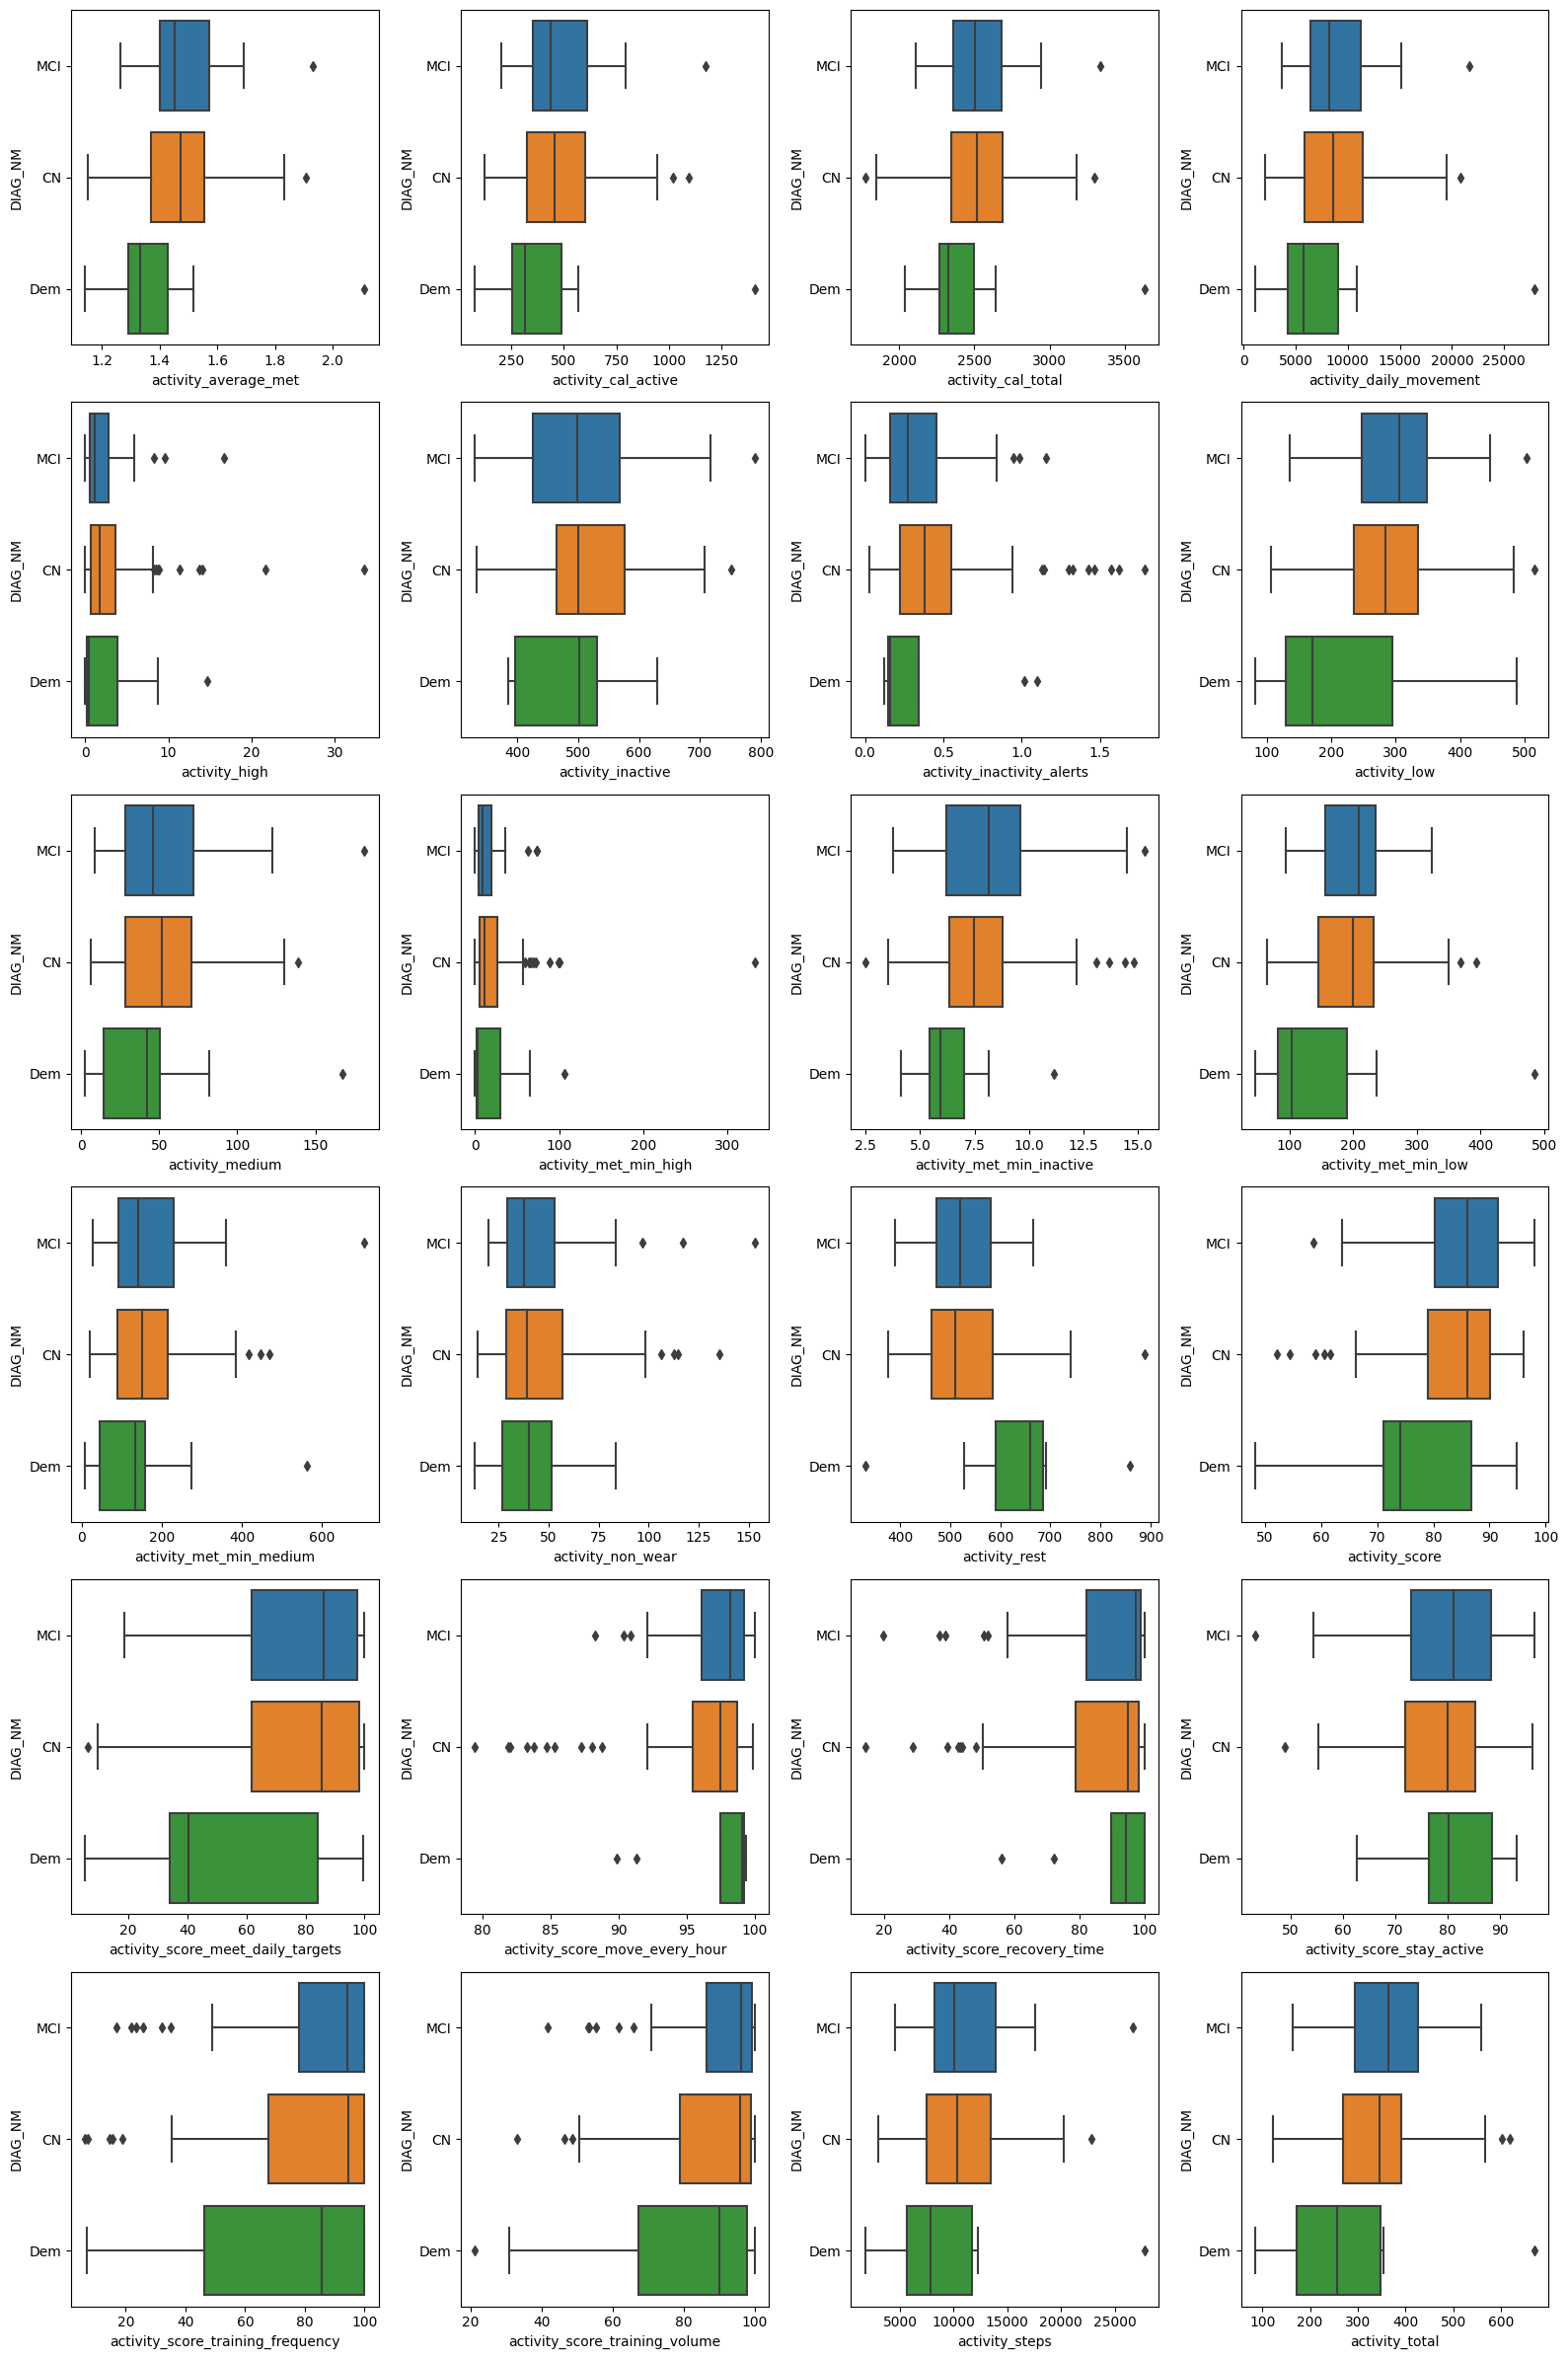

In [24]:
# activity 데이터셋과 라벨링 결과가 합쳐진 데이터를 이용하여 인지능력을 구분하는 'DIAG_NM'열의 값으로 데이터들을 구분해 각 독립변수와의 관계를 시각화해보았다.
category_col = 'DIAG_NM'
continuous_cols = [col for col in label_activity_merge.columns if col != category_col]

fig, axes = plt.subplots(6, 4, figsize=(16, 24))

# 서브플롯에 그래프 할당
for i, var in enumerate(continuous_cols):
    row = i // 4  # 행 인덱스 계산
    col = i % 4   # 열 인덱스 계산
    sns.boxplot(x=var, y=category_col, data=label_activity_merge, ax=axes[row, col])

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

In [25]:
#치매를 나타내는 Dem에서 대부분의 그래프에서 나타나는 이상치가 존재하였다.
#label_activity_merge.activity_total[label_activity_merge['DIAG_NM'] == "Dem"] 을 통해 activity_total에서 가장 큰 값인 670을 갖는 이메일("nia+219@rowan.kr")을 확인 한 후
#그 참가자의 다른 값들을 확인해보았다. 대부분 값이 이상치에 포함되는 것을 확인할 수 있었다.
#추후, 기계학습을 진행할 때 이 참가자를 제외한 후 학습하면 정확도가 높아지지 않을까라는 생각을 하여 확인해봄
label_activity_merge.loc["nia+219@rowan.kr"]

activity_average_met                     2.110085
activity_cal_active                   1409.318182
activity_cal_total                    3630.522727
activity_daily_movement              27917.840909
activity_high                           14.681818
activity_inactive                      395.227273
activity_inactivity_alerts               0.340909
activity_low                           488.181818
activity_medium                             167.5
activity_met_min_high                  106.340909
activity_met_min_inactive                4.909091
activity_met_min_low                   484.522727
activity_met_min_medium                561.363636
activity_non_wear                       17.954545
activity_rest                          329.772727
activity_score                          86.727273
activity_score_meet_daily_targets       99.545455
activity_score_move_every_hour          97.477273
activity_score_recovery_time            56.159091
activity_score_stay_active                   89.0


## **종속변수와 다양한 독립변수와의 관계를 그래프로 시각화하니 치매인 참가자와 아닌 참가자의 차이점을 확인할 수 있다.**

#**그래프 상 차이가 두드러지는 지점을 살펴보면, activity_low, activity_met_min_inactive, activity_met_min_low,  activity_rest, activity_score_meet_daily_targets 열 등이 있다.**  
  

#**이 시각화를 통해 활동이 적을 수록, 몸을 움직이는 것이 적을 수록 치매일 확률이 높다는 것을 확인 할 수 있다.**




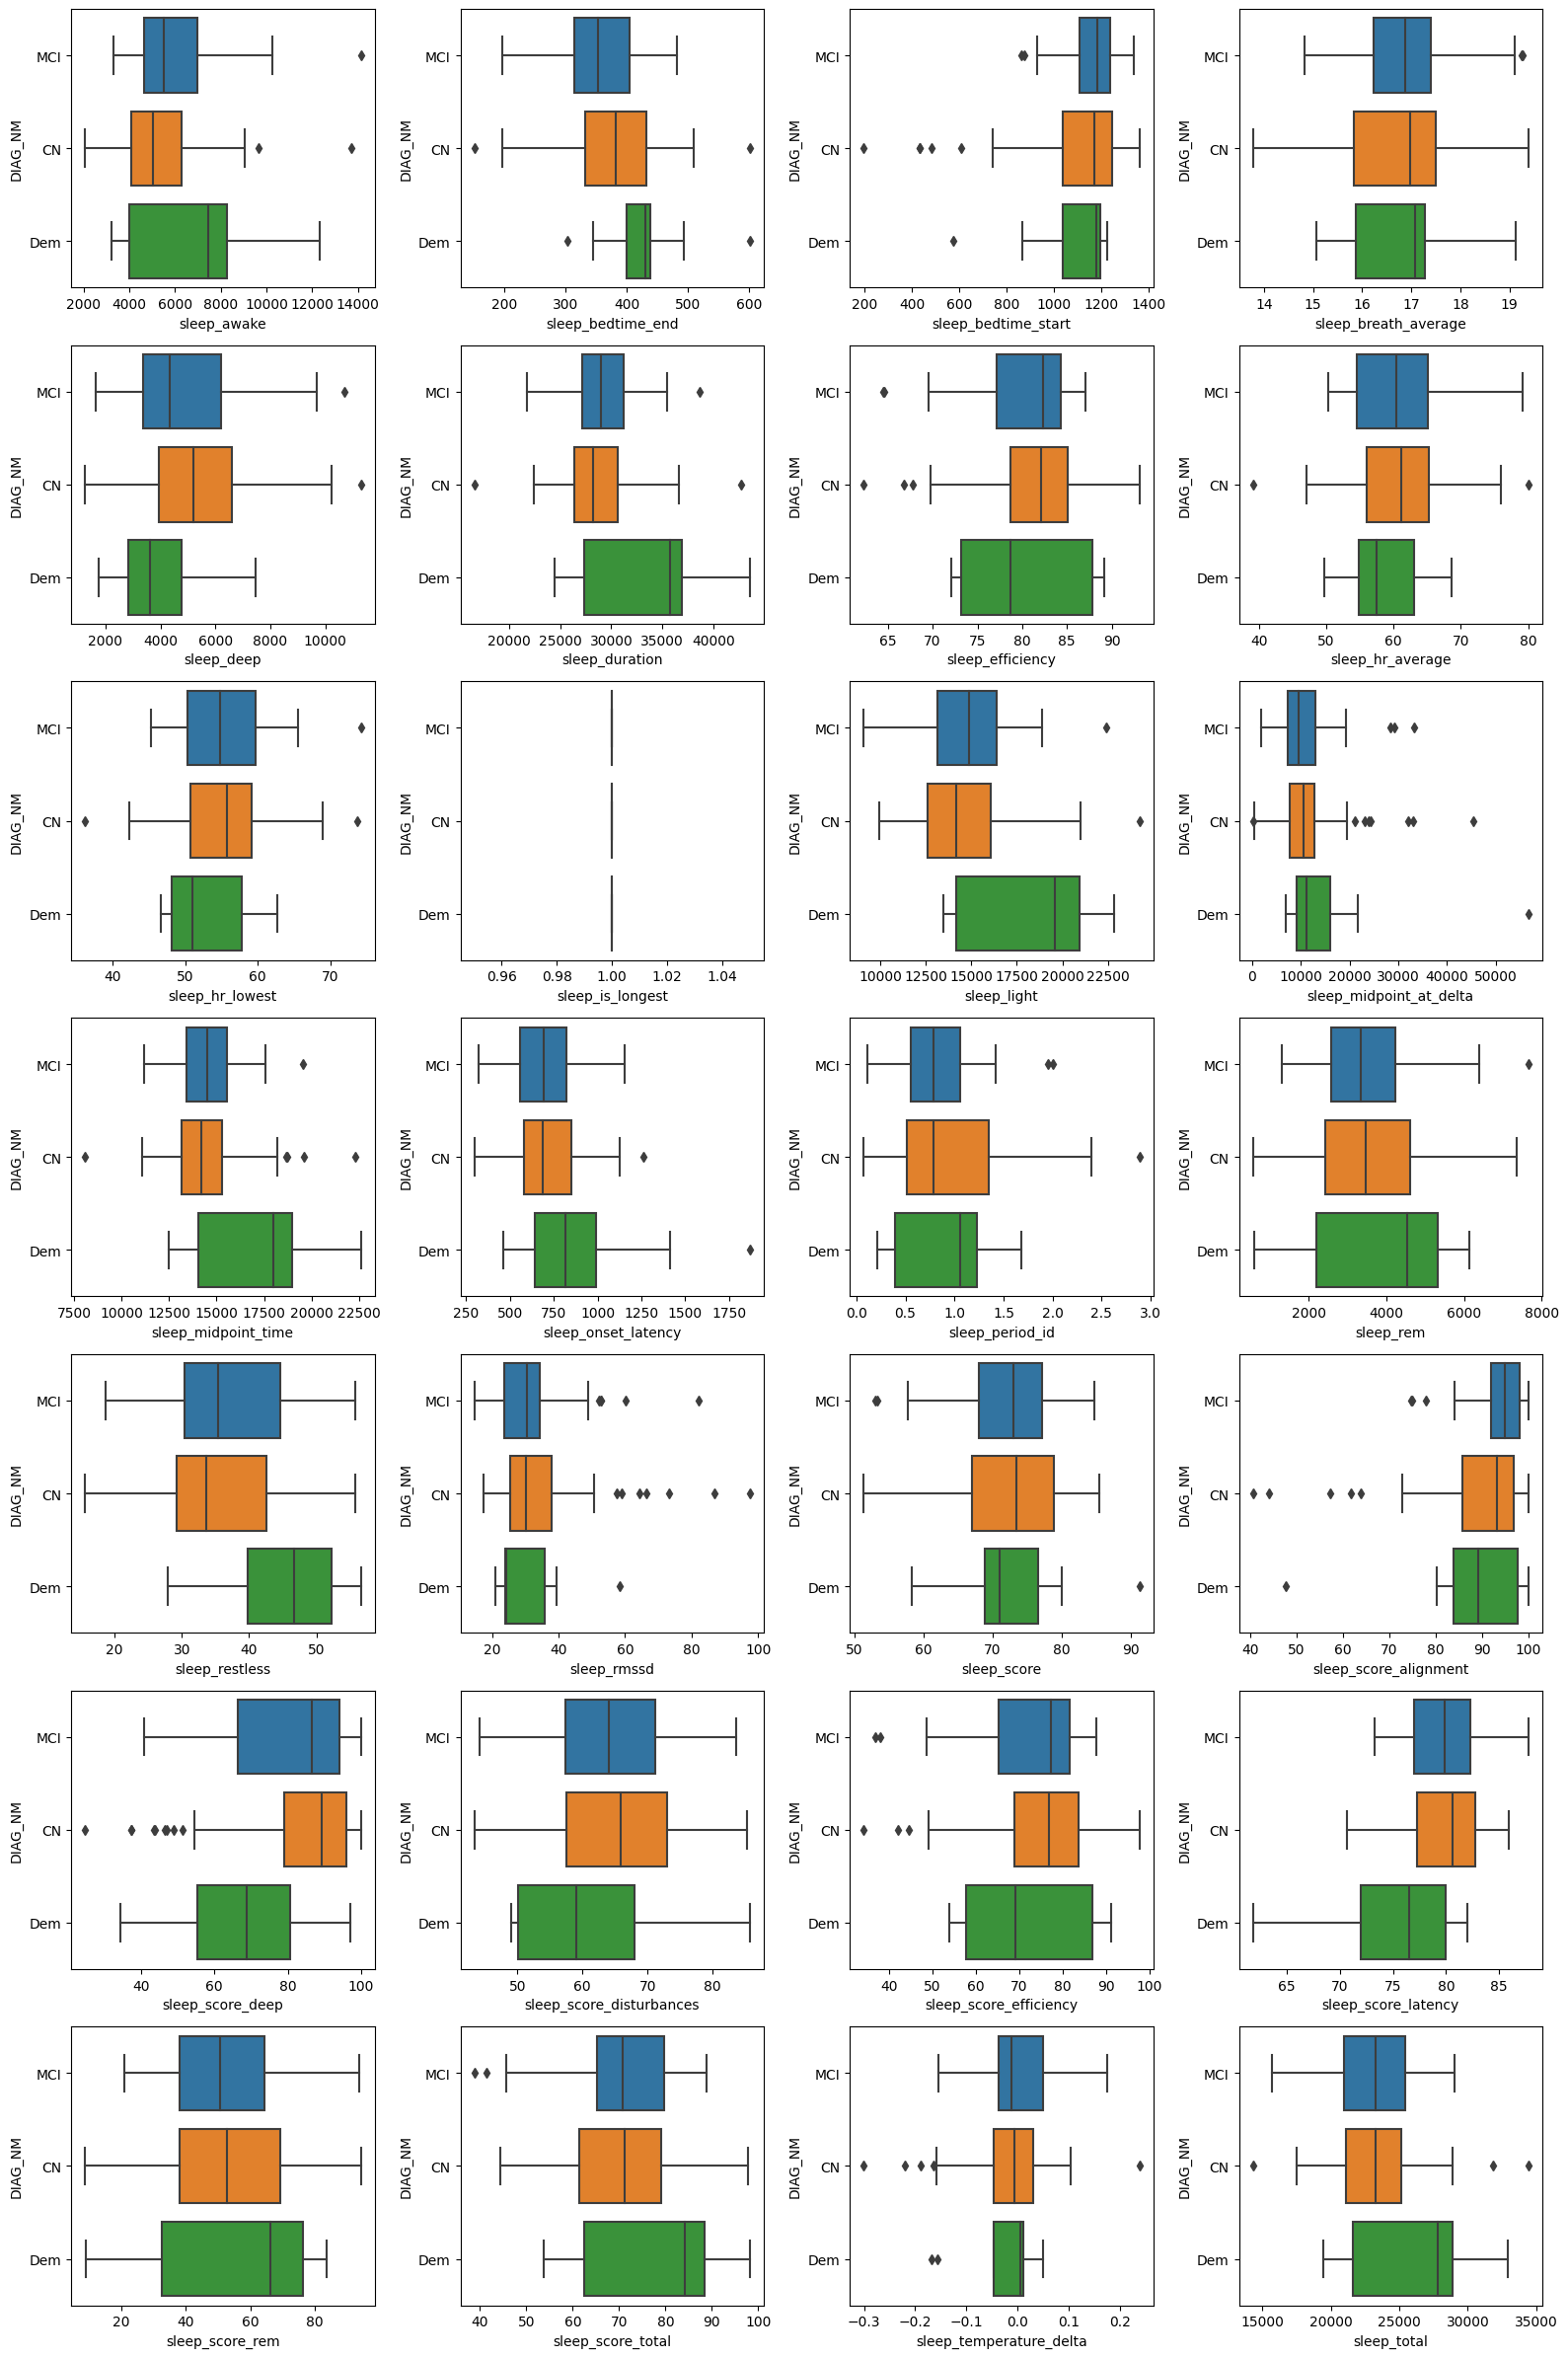

In [26]:
#sleep 데이터셋도 동일하게 종속변수와 모든 독립변수사이의 관계를 시각화해보았다.

category_col = 'DIAG_NM'
continuous_cols = [col for col in label_sleep_merge.columns if col != category_col]

fig, axes = plt.subplots(7, 4, figsize=(16, 24))

# 서브플롯에 그래프 할당
for i, var in enumerate(continuous_cols):
    row = i // 4  # 행 인덱스 계산
    col = i % 4   # 열 인덱스 계산
    sns.boxplot(x=var, y=category_col, data=label_sleep_merge, ax=axes[row, col])

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

#**sleep 데이터셋에서 3개의 클래스가 차이를 보이는 열은 sleep_awake, sleep_efficiency, sleep_light, sleep_midpoint_time, sleep_restless(뒤척임 비율), sleep_total(수면 시간) 등이다.**  

#이를 통해 우리는 치매일 경우 수면 시간은 길지만 중간에 깨거나, 뒤척임이 많고 깊은 잠보다 얕은 잠을 잔다는 것을 알 수 있다.

In [27]:
#activity 데이터셋의 클래스별 열들에 관한 평균 값을 계산해보았다.
label_activity_merge.groupby('DIAG_NM').agg(['mean'])

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DIAG_NM,,,,,,,,,,,,,,,,,,,,,
CN,1.476834,475.121782,2510.118900,8974.804075,3.410526,517.685582,0.477955,287.888861,52.626016,24.522559,...,524.053698,83.063231,77.575334,95.837723,85.601505,77.830084,81.384958,87.763120,10766.244264,343.925402
Dem,1.411543,435.425570,2469.621560,8174.389211,3.447614,484.598463,0.389787,222.984236,49.973447,25.455050,...,626.995386,74.809057,49.942071,96.972228,89.514493,80.924794,69.585927,76.209531,9444.335128,276.405297
MCI,1.478336,473.206253,2529.526229,8917.679217,2.248346,504.359837,0.350226,303.141509,53.053467,15.251095,...,524.054387,84.275639,78.436364,97.255575,87.461075,79.477401,81.472443,88.456093,10999.734269,358.443322


In [28]:
#sleep 데이터셋의 클래스별 열들에 관한 평균 값을 계산해보았다.
label_sleep_merge.groupby('DIAG_NM').agg(['mean'])

,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,...,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_total
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DIAG_NM,,,,,,,,,,,,,,,,,,,,,
CN,5346.817838,376.809000,1103.053912,16.779073,5317.151039,28624.763283,81.960027,60.726765,55.222523,1.0,...,72.737816,89.386021,83.423826,65.470184,76.139029,79.965890,53.605936,70.425456,-0.015401,23277.945445
Dem,6953.547562,427.463144,1058.382219,16.770831,4117.524171,33311.050827,80.071651,58.951233,53.159257,1.0,...,72.179847,86.063654,68.198072,61.355239,71.412607,75.003648,56.553636,77.801299,-0.034842,26357.503265
MCI,5917.385821,354.041286,1163.728051,16.920779,4858.972233,29111.582775,80.302611,60.435375,55.112307,1.0,...,72.127293,93.854808,79.801590,64.386660,72.448936,79.972180,52.363932,70.304252,0.003069,23194.196955


# 3가지로 나눠지는 클래스를 예측하기 위하여 우리는 기계학습시 로지스틱 회귀분석을 사용할 것이다. 일단 독립변수끼리의 상관관계를 분석하기 위하여 corr()을 사용하고 시각화하였다.  

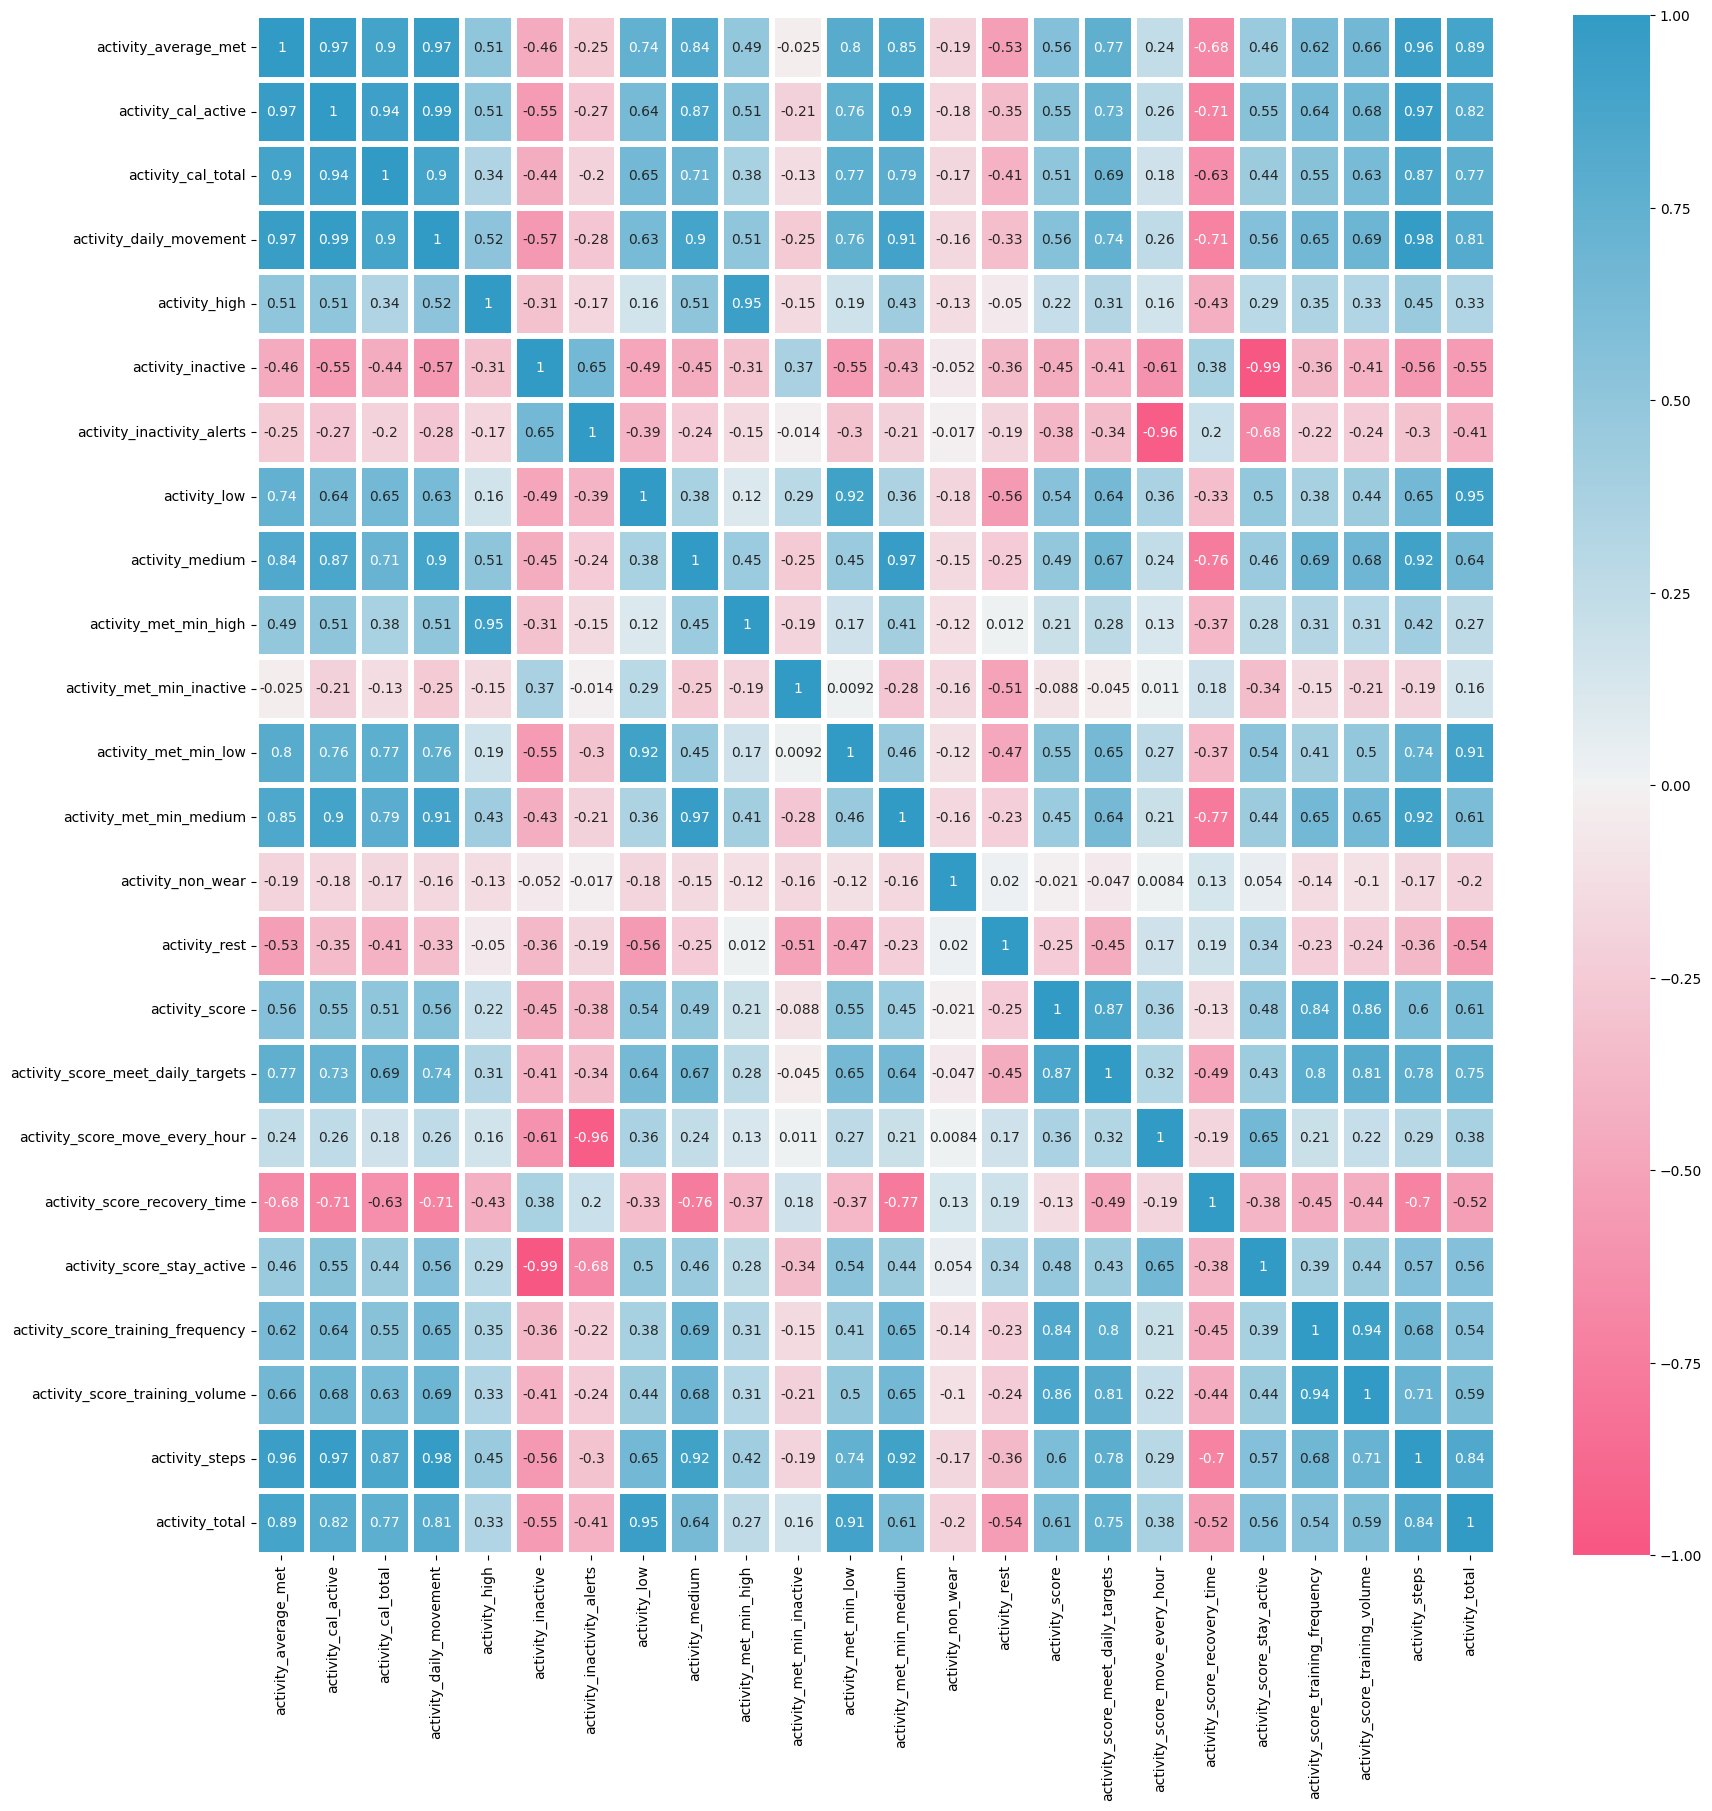

In [29]:
# 기계학습을 위하여 독립변수끼리의 상관관계를 직관적으로 확인하기 위해서 시각화 해보았다.
fig, ax = plt.subplots(figsize = (20,20))
df_corr = grouping_activity.corr()
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(data = df_corr, cmap = cmap, vmin = -1, vmax=1,linewidths=3, annot = True)
plt.show()

#activity_cal_total과 activity_daily_movement 의 상관관계는 0.99이다. 많이 움직인 만큼 활동 칼로리가 증가할 것이기 때문에 activity_cal_total 열은 삭제 할 것
#activity_score_stay_active(활동 유지 점수)와 activity_inactivity(비활동 시간)의 상관관계는 -0.99로 나타났다. 비활동 시간이 증가하면 활동 유지 점수가 낮아진다고 생각할 수 있기 때문에 activity_score_stay_active열을 삭제하여 사용하는 독립변수의 수를 줄여줄 것이다.
#또한 대부분의 이상치 값을 가졌던 nia+219@rowan.kr 행을 삭제하여 정확도를 높여보고자 하였다.

In [30]:
final_label_activity_merge = label_activity_merge.drop(['activity_cal_total', 'activity_score_stay_active'], axis = 1)
final_label_activity_merge.drop('nia+219@rowan.kr', axis=0, inplace=True)

In [32]:
final_label_activity_merge

,activity_average_met,activity_cal_active,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,...,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,DIAG_NM
SAMPLE_EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.262897,202.571429,3659.730159,0.793651,615.142857,0.809524,146.428571,18.333333,5.984127,6.190476,...,618.063492,58.682540,18.793651,92.492063,99.698413,21.682540,53.031746,4518.460317,165.555556,MCI
nia+005@rowan.kr,1.370299,217.477876,5084.876106,0.256637,574.619469,0.539823,281.300885,15.398230,1.778761,11.513274,...,521.247788,54.522124,11.601770,95.566372,96.203540,6.371681,46.530973,6431.831858,296.955752,CN
nia+010@rowan.kr,1.390625,259.672414,3877.741379,0.637931,632.482759,0.362069,328.827586,9.068966,4.379310,14.500000,...,434.086207,65.758621,54.068966,97.155172,99.862069,16.982759,41.637931,5868.758621,338.534483,MCI
nia+014@rowan.kr,1.442555,401.382353,7250.514706,0.382353,534.470588,0.176471,343.852941,30.970588,3.382353,8.808824,...,492.205882,91.264706,92.147059,99.117647,98.235294,83.750000,93.058824,9444.338235,375.205882,MCI
nia+015@rowan.kr,1.388393,271.685714,5053.200000,2.057143,484.085714,0.285714,326.485714,28.285714,8.971429,10.400000,...,493.057143,79.000000,72.542857,98.571429,99.885714,43.628571,62.342857,7211.600000,356.828571,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,1.625822,660.394737,12410.868421,8.710526,499.973684,0.447368,302.868421,78.710526,70.026316,6.763158,...,477.500000,90.552632,98.315789,96.184211,78.921053,100.000000,99.868421,14147.421053,390.289474,CN
nia+456@rowan.kr,1.542480,573.781250,10846.750000,5.421875,610.515625,0.609375,283.140625,64.000000,40.562500,6.625000,...,433.781250,87.359375,96.984375,95.437500,76.703125,100.000000,99.453125,11940.390625,352.562500,CN
nia+458@rowan.kr,1.257353,200.549020,3377.098039,0.588235,507.117647,0.392157,206.823529,9.176471,4.333333,6.764706,...,667.764706,61.686275,23.215686,97.568627,99.019608,18.705882,53.647059,4347.235294,216.588235,CN


In [33]:
#학습을 위해 학습데이터와 테스트데이터를 분리하였다.
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(final_label_activity_merge.iloc[:, :-1], final_label_activity_merge.iloc[:,-1], test_size = 0.3, random_state = 42)

In [34]:
#140개의 행중 98개의 행(70%)이 train 데이터로 할당되었음
train_X

,activity_average_met,activity_cal_active,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,...,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total
SAMPLE_EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+137@rowan.kr,1.371686,381.136364,7223.378788,0.136364,495.075758,0.681818,215.712121,51.757576,0.954545,5.106061,...,45.106061,619.530303,88.863636,95.136364,95.303030,76.515152,100.000000,97.515152,8882.303030,267.606061
nia+078@rowan.kr,1.478588,423.518519,7501.231481,0.398148,578.944444,0.398148,330.185185,40.481481,3.009259,12.175926,...,36.092593,442.157407,83.277778,75.046296,97.009259,97.055556,67.685185,89.351852,9989.750000,371.064815
nia+330@rowan.kr,1.332212,275.584615,5408.553846,1.953846,539.384615,0.338462,235.446154,29.492308,11.430769,7.846154,...,29.769231,603.953846,74.969231,50.800000,97.738462,99.907692,50.784615,74.476923,6908.369231,266.892308
nia+415@rowan.kr,1.355035,273.208333,4456.152778,0.069444,596.402778,0.527778,245.527778,23.722222,0.527778,11.847222,...,69.500000,504.777778,72.833333,50.791667,95.666667,99.527778,61.569444,61.222222,6484.111111,269.319444
nia+363@rowan.kr,1.330038,251.969388,4754.867347,1.428571,550.775510,0.459184,244.010204,24.132653,6.816327,8.755102,...,34.530612,585.122449,72.459184,46.775510,96.591837,98.887755,48.887755,69.234694,6503.387755,269.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+233@rowan.kr,1.379127,310.698113,5868.245283,0.018868,670.943396,0.943396,196.716981,32.849057,0.132075,7.905660,...,70.094340,448.641509,86.056604,84.547170,92.301887,96.849057,90.037736,89.773585,7447.301887,229.584906
nia+353@rowan.kr,1.362772,298.086957,5402.500000,0.282609,751.728261,1.782609,162.728261,37.510870,2.076087,6.586957,...,51.228261,436.521739,60.565217,50.989130,79.467391,83.652174,42.184783,50.891304,7232.902174,200.521739
nia+044@rowan.kr,1.593284,672.358209,12904.626866,0.656716,428.447761,0.089552,327.388060,96.089552,4.970149,6.179104,...,20.402985,536.179104,85.388060,99.776119,99.552239,51.835821,100.000000,100.000000,16136.328358,424.134328


In [35]:
train_y.value_counts()

CN     60
MCI    31
Dem     7
Name: DIAG_NM, dtype: int64

In [36]:
#로지스틱회귀 모델을 이용하여 train 데이터를 이용하여 모델을 학습시켰다.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=1)
model.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [37]:
#학습된 모델을 이용하여 text 데이터를 통해 y를 예측하고
#정확도(실제 y값과 예측 y값을 이용)를 통해 모델을 평가하였다.
y_pred = model.predict(test_X)

acc = accuracy_score(test_y, y_pred)
print(acc)

#61%의 정확도를 가진 모델임을 확인하였다.

0.6190476190476191


In [38]:
y_pred

array(['CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'Dem', 'CN', 'CN', 'CN',
       'CN', 'CN', 'CN', 'CN', 'MCI', 'CN', 'CN', 'CN', 'CN', 'MCI', 'CN',
       'Dem', 'MCI', 'CN', 'CN', 'CN', 'CN', 'MCI', 'CN', 'MCI', 'CN',
       'CN', 'MCI', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI'],
      dtype=object)

In [39]:
test_y

SAMPLE_EMAIL
nia+356@rowan.kr     CN
nia+227@rowan.kr     CN
nia+106@rowan.kr    MCI
nia+396@rowan.kr     CN
nia+141@rowan.kr     CN
nia+041@rowan.kr     CN
nia+283@rowan.kr    MCI
nia+229@rowan.kr     CN
nia+349@rowan.kr     CN
nia+358@rowan.kr     CN
nia+368@rowan.kr     CN
nia+182@rowan.kr    MCI
nia+220@rowan.kr     CN
nia+066@rowan.kr    MCI
nia+440@rowan.kr     CN
nia+268@rowan.kr    MCI
nia+039@rowan.kr     CN
nia+088@rowan.kr    MCI
nia+421@rowan.kr     CN
nia+360@rowan.kr     CN
nia+126@rowan.kr    MCI
nia+394@rowan.kr     CN
nia+196@rowan.kr    Dem
nia+015@rowan.kr     CN
nia+438@rowan.kr     CN
nia+083@rowan.kr    MCI
nia+462@rowan.kr    MCI
nia+334@rowan.kr     CN
nia+050@rowan.kr     CN
nia+061@rowan.kr    MCI
nia+037@rowan.kr    MCI
nia+361@rowan.kr     CN
nia+343@rowan.kr     CN
nia+331@rowan.kr     CN
nia+171@rowan.kr    MCI
nia+153@rowan.kr    MCI
nia+284@rowan.kr    MCI
nia+456@rowan.kr     CN
nia+214@rowan.kr     CN
nia+003@rowan.kr    MCI
nia+181@rowan.kr     CN
nia

#sleep 데이터셋을 로지스틱 회귀 모델을 이용하여 학습 시켜준다.  
#activity 데이터셋을 이용했을 때와 동일한 과정을 반복한다.

In [40]:
train_X, test_X, train_y, test_y = train_test_split(label_sleep_merge.iloc[:, :-1], label_sleep_merge.iloc[:,-1], test_size = 0.3, random_state = 42)

In [41]:
train_y.value_counts()

CN     60
MCI    31
Dem     7
Name: DIAG_NM, dtype: int64

In [42]:
model = LogisticRegression(random_state=1)
model.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [43]:
y_pred = model.predict(test_X)

acc = accuracy_score(test_y, y_pred)
print(acc)

0.6046511627906976


In [44]:
y_pred

array(['CN', 'CN', 'MCI', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI', 'CN',
       'MCI', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN',
       'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI', 'CN', 'CN', 'CN',
       'MCI', 'CN', 'CN', 'CN', 'CN', 'Dem', 'MCI', 'CN', 'CN', 'CN',
       'MCI'], dtype=object)

#activity 데이터셋을 이용해 모델을 학습시켰을 때 정확도는 61%,  
#sleep 데이터셋을 이용해 모델을 학습시켰을 때는 60%의 정확도를 보였다.
#그리 높지 않은 정확도가 나왔는데, 그 이유를 생각해보면 학습 데이터의 개수가 많지 않았고, 3개의 클래스가 비슷한 개수로 이루어지지 않았기 때문이라고 예측하고 있다. (CN의 개수가 많고 Dem의 개수가 아주 적었음)
#이번 분석을 통하여, 데이터 셋의 전처리 과정이 가장 어려운 부분이라고 생각했다.
#추후에 다른 데이터분석 프로젝트를 진행하게 된다면, 전처리를 다양한 방법을 생각하여 실행해야겠다고 생각했다.